# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observed Trends
* The closer you get to the equator the hotter it tends to be, this is the same for both Northern and Southern Hemispheres.
* Wind speed and humidity have very small correlation to the latitude a city is in.
* Overall there does not seem to be much correlation between cloudniess and latitude of a city, but when broken into hemispheres, there is a weak positive correlation. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# URL for openweathermap API
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create empty list and counter for record number and data
record_count = 0
city_data = []
set_count = 1

# Loop through cities list 
print("Beginning Data Retrieval")
print("--------------------------")

for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    response = requests.get(query_url).json()
    
    try:
        data = {
            "City": city,
            "Lat": response['coord']['lat'],
            "Lng": response['coord']['lon'],
            "Max Temp": response['main']['temp_max'],
            "Humidity": response['main']['humidity'],
            "Cloudiness": response['clouds']['all'],
            "Wind Speed": response['wind']['speed'],
            "Country": response['sys']['country'],
            "Date": response['dt']
        }
        city_data.append(data)
        record_count += 1
        if record_count > 50:
            set_count += 1
            record_count = 1
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    except:
        print("City not found")
        
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval
--------------------------
Processing Record 1 of Set 1 | savinka
Processing Record 2 of Set 1 | pangnirtung
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | kasane
Processing Record 5 of Set 1 | leninsk-kuznetskiy
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | weligama
Processing Record 9 of Set 1 | cape town
City not found
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | narsaq
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | graaff-reinet
Processing Record 19 of Set 1 | lerwick
Processing Record 20 of Set 1 | esperance
Processing Record 21 of Set 1 | weiser
Processing Record 22 of Set 1 | hobart
Processing Record 23 of Set 1 | east londo

Processing Record 43 of Set 4 | husavik
Processing Record 44 of Set 4 | harper
Processing Record 45 of Set 4 | acajutla
Processing Record 46 of Set 4 | sao gabriel da cachoeira
City not found
Processing Record 47 of Set 4 | ikalamavony
Processing Record 48 of Set 4 | new norfolk
Processing Record 49 of Set 4 | storslett
Processing Record 50 of Set 4 | san jeronimo
Processing Record 1 of Set 5 | saint george
Processing Record 2 of Set 5 | progreso
Processing Record 3 of Set 5 | salinopolis
Processing Record 4 of Set 5 | dudinka
Processing Record 5 of Set 5 | trat
Processing Record 6 of Set 5 | krasnoarmeysk
Processing Record 7 of Set 5 | newala
Processing Record 8 of Set 5 | lata
Processing Record 9 of Set 5 | anloga
Processing Record 10 of Set 5 | dunedin
Processing Record 11 of Set 5 | salalah
Processing Record 12 of Set 5 | vanimo
Processing Record 13 of Set 5 | umba
Processing Record 14 of Set 5 | bemidji
City not found
City not found
City not found
Processing Record 15 of Set 5 | s

Processing Record 40 of Set 8 | katsuura
Processing Record 41 of Set 8 | khatanga
Processing Record 42 of Set 8 | kloulklubed
Processing Record 43 of Set 8 | lorengau
Processing Record 44 of Set 8 | port lincoln
Processing Record 45 of Set 8 | venado tuerto
Processing Record 46 of Set 8 | kortkeros
Processing Record 47 of Set 8 | jasper
Processing Record 48 of Set 8 | vallenar
Processing Record 49 of Set 8 | kroya
Processing Record 50 of Set 8 | yatou
Processing Record 1 of Set 9 | takaungu
Processing Record 2 of Set 9 | blackwater
Processing Record 3 of Set 9 | paulista
Processing Record 4 of Set 9 | ahipara
Processing Record 5 of Set 9 | nara
Processing Record 6 of Set 9 | sabya
Processing Record 7 of Set 9 | kirakira
Processing Record 8 of Set 9 | seoul
Processing Record 9 of Set 9 | zhanakorgan
Processing Record 10 of Set 9 | quelimane
Processing Record 11 of Set 9 | horta
Processing Record 12 of Set 9 | metro
Processing Record 13 of Set 9 | brae
Processing Record 14 of Set 9 | don

Processing Record 34 of Set 12 | andenes
Processing Record 35 of Set 12 | gebre guracha
Processing Record 36 of Set 12 | jaciara
Processing Record 37 of Set 12 | dosso
Processing Record 38 of Set 12 | boysun
Processing Record 39 of Set 12 | yankton
City not found
Processing Record 40 of Set 12 | bac lieu
Processing Record 41 of Set 12 | ranot
City not found
Processing Record 42 of Set 12 | pathein
Processing Record 43 of Set 12 | fairbanks
Processing Record 44 of Set 12 | kardamas
Processing Record 45 of Set 12 | evensk
Processing Record 46 of Set 12 | gao
City not found
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [91]:
# Display DataFrame
# city_data_df = pd.DataFrame(city_data)

# # Export to csv file
# output_data_file = city_data_df.to_csv("output_data/cities.csv",index=False)

# city_data_df.head()

# Read from csv
city_data_df = pd.read_csv(output_data_file)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,savinka,50.08,47.10,25.09,72,0,9.91,RU,1605855250
1,pangnirtung,66.15,-65.71,6.31,88,47,3.78,CA,1605855250
2,hithadhoo,-0.60,73.08,81.59,69,100,5.68,MV,1605855251
3,kasane,-17.82,25.15,69.80,100,75,6.93,BW,1605855251
4,leninsk-kuznetskiy,54.66,86.17,15.80,78,90,11.18,RU,1605855251


In [43]:
weather_vis.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,5.960000e+02
mean,19.569027,17.832399,56.526946,74.154362,53.199664,8.295721,1.605855e+09
std,33.239284,89.571317,25.106804,19.246731,40.946434,6.078300,6.418569e+01
min,-54.800000,-175.200000,-20.200000,9.000000,0.000000,0.180000,1.605855e+09
25%,-6.357500,-63.195000,36.000000,64.000000,3.000000,3.447500,1.605855e+09
50%,20.610000,20.230000,62.770000,78.000000,64.500000,6.930000,1.605855e+09
75%,49.045000,100.342500,77.105000,89.000000,98.000000,11.410000,1.605855e+09
max,78.220000,178.420000,100.400000,100.000000,100.000000,42.500000,1.605855e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [27]:
weather_stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,5.960000e+02
mean,19.569027,17.832399,56.526946,74.154362,53.199664,8.295721,1.605855e+09
std,33.239284,89.571317,25.106804,19.246731,40.946434,6.078300,6.418569e+01
min,-54.800000,-175.200000,-20.200000,9.000000,0.000000,0.180000,1.605855e+09
max,78.220000,178.420000,100.400000,100.000000,100.000000,42.500000,1.605855e+09
0.25,-6.357500,-63.195000,36.000000,64.000000,3.000000,3.447500,1.605855e+09
0.5,20.610000,20.230000,62.770000,78.000000,64.500000,6.930000,1.605855e+09
0.75,49.045000,100.342500,77.105000,89.000000,98.000000,11.410000,1.605855e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

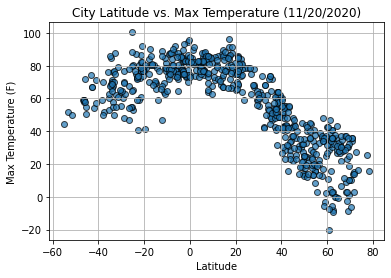

In [129]:
plt.scatter(city_data_df["Lat"]
            ,city_data_df["Max Temp"],edgecolor='black',alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (11/20/2020)")
plt.grid(b=True)
plt.savefig("output_data/lat_temp.png")
plt.show()


Shows the relation between changing latitude of cities and the max temperature to expect. From the scatter plot, we can see that as the latitude decreases, the max temperature increases until it reaches the equator. After that equator and as the latitude goes into the negatives, the max temperature start to slow decrease as well.

## Latitude vs. Humidity Plot

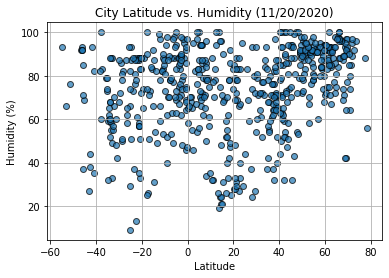

In [132]:
plt.scatter(city_data_df["Lat"]
            ,city_data_df["Humidity"],edgecolor='black',alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (11/20/2020)")
plt.grid(b=True)
plt.savefig("output_data/lat_hum.png")
plt.show()

The plot shows us the relation between latitude of a city and humidity. From what we can see it does tend to get more humid as the latitude increases. There is a big concentration of cities that experience high humidity as the latitude reach 60. 

## Latitude vs. Cloudiness Plot

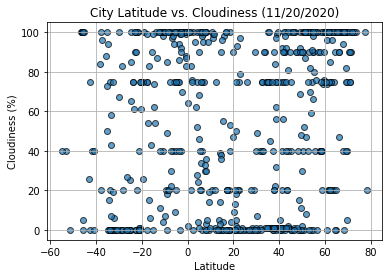

In [133]:
plt.scatter(city_data_df["Lat"]
            ,city_data_df["Cloudiness"],edgecolor='black',alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (11/20/2020)")
plt.grid(b=True)
plt.savefig("output_data/lat_cloud.png")
plt.show()

This plot shows the relation between the city latitude and the cloudiness they may experience. From what we can see from the plot, there is not much relation between the two, as cloudiness is pretty spread out, from 0% to 100% cloudiness, throughout the latitude range. 

## Latitude vs. Wind Speed Plot

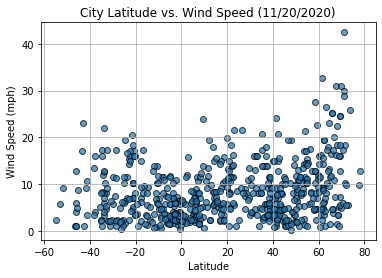

In [134]:
plt.scatter(city_data_df["Lat"]
            ,city_data_df["Wind Speed"],edgecolor='black',alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (11/20/2020)")
plt.grid(b=True)
plt.savefig("output_data/lat_wind.png")
plt.show()

This plot shows the relation between the latitude of a city to the wind speeds they may experience. We can see that there is very little relation between these two, as wind speed is consistent throughout the latitudes sampled. 

## Linear Regression

In [114]:
# Northern Hemisphere data

nh_data = city_data_df[city_data_df['Lat']>=0]
nh_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,savinka,50.08,47.10,25.09,72,0,9.91,RU,1605855250
1,pangnirtung,66.15,-65.71,6.31,88,47,3.78,CA,1605855250
4,leninsk-kuznetskiy,54.66,86.17,15.80,78,90,11.18,RU,1605855251
5,hilo,19.73,-155.09,75.20,83,90,5.82,US,1605855251
6,albany,42.60,-73.97,43.00,54,100,3.00,US,1605855004


In [115]:
# Southern Hemisphere data

sh_data = city_data_df[city_data_df['Lat']<=0]
sh_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,hithadhoo,-0.60,73.08,81.59,69,100,5.68,MV,1605855251
3,kasane,-17.82,25.15,69.80,100,75,6.93,BW,1605855251
8,cape town,-33.93,18.42,71.01,52,0,3.36,ZA,1605855252
9,kaitangata,-46.28,169.85,57.99,93,100,5.99,NZ,1605855252
10,atuona,-9.80,-139.03,78.28,73,7,6.85,PF,1605855252


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8832350553620155


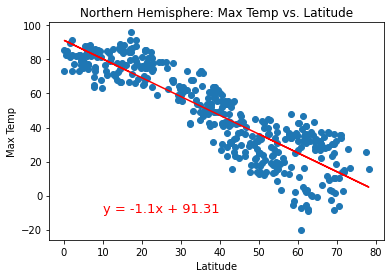

In [135]:
x_valueNH = nh_data['Lat']
y_valueNH = nh_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_valueNH, y_valueNH)
regress_values = x_valueNH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_valueNH,y_valueNH)
plt.plot(x_valueNH,regress_values,color='red')
plt.annotate(line_eq,(10,-10),fontsize=13,color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere: Max Temp vs. Latitude")
plt.savefig("output_data/n_hemisphere_lat_temp.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5743361841893252


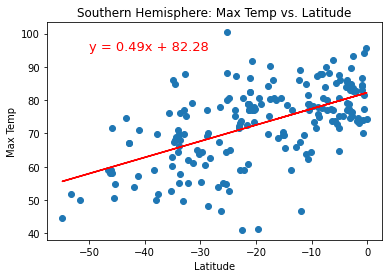

In [146]:
x_valueSH = sh_data['Lat']
y_valueSH = sh_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_valueSH, y_valueSH)
regress_values = x_valueSH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_valueSH,y_valueSH)
plt.plot(x_valueSH,regress_values,color='red')
plt.annotate(line_eq,(-50,95),fontsize=13,color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere: Max Temp vs. Latitude")
plt.savefig("output_data/s_hemisphere_lat_temp.png")
plt.show()

These plots show the comparsion between Northern and Southern Hemisphere's max temperature. We see that the northern hemisphere has a strong negative correlation between the temperature and latitude of a city, whereas the southern hemisphere has a positive correlation. The northern hemisphere does have almost twice the amount of data points sampled compared to the southern hemisphere so that may have affected the r-value.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.38262244385184235


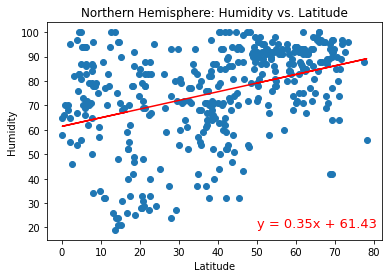

In [137]:
x_valueNH1 = nh_data['Lat']
y_valueNH1 = nh_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_valueNH1, y_valueNH1)
regress_values = x_valueNH1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_valueNH1,y_valueNH1)
plt.plot(x_valueNH1,regress_values,color='red')
plt.annotate(line_eq,(50,20),fontsize=13,color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere: Humidity vs. Latitude")
plt.savefig("output_data/n_hemisphere_lat_hum.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.21017266648101382


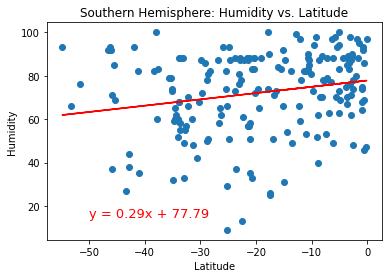

In [145]:
x_valueSH1 = sh_data['Lat']
y_valueSH1 = sh_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_valueSH1, y_valueSH1)
regress_values = x_valueSH1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_valueSH1,y_valueSH1)
plt.plot(x_valueSH1,regress_values,color='red')
plt.annotate(line_eq,(-50,15),fontsize=13,color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere: Humidity vs. Latitude")
plt.savefig("output_data/s_hemisphere_lat_hum.png")
plt.show()

These plots show humidity of cities in both hemispheres. We can see from the two plots that humidity in both northern and southern hemispheres have a weak positive correlation in relation to the city latitude. This tells us that humidity does increase slightly as the latitude the city is in increases. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3091643719858117


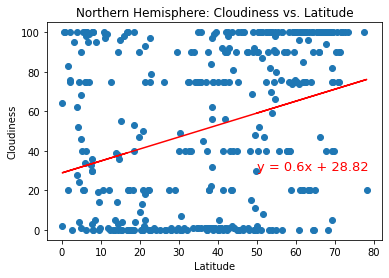

In [141]:
x_valueNH2 = nh_data['Lat']
y_valueNH2 = nh_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_valueNH2, y_valueNH2)
regress_values = x_valueNH2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_valueNH2,y_valueNH2)
plt.plot(x_valueNH2,regress_values,color='red')
plt.annotate(line_eq,(50,30),fontsize=13,color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")
plt.savefig("output_data/n_hemisphere_lat_cloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3836887703815708


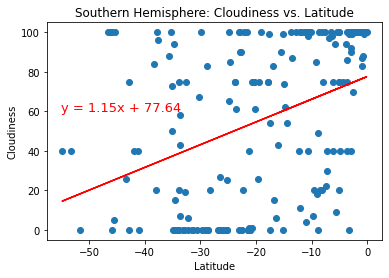

In [142]:
x_valueSH2 = sh_data['Lat']
y_valueSH2 = sh_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_valueSH2, y_valueSH2)
regress_values = x_valueSH2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_valueSH2,y_valueSH2)
plt.plot(x_valueSH2,regress_values,color='red')
plt.annotate(line_eq,(-55,60),fontsize=13,color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere: Cloudiness vs. Latitude")
plt.savefig("output_data/s_hemisphere_lat_cloud.png")
plt.show()

Looking at the two charts for cloudiness in cities, we see that both northern and southern hemispheres have a weak positive correlation. This tells us that cloudiness does tend to increase slightly as the latitude the city is in increases. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.28402015656972385


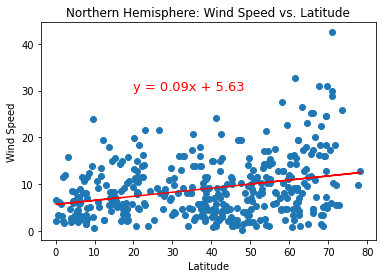

In [143]:
x_valueNH3 = nh_data['Lat']
y_valueNH3 = nh_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_valueNH3, y_valueNH3)
regress_values = x_valueNH3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_valueNH3,y_valueNH3)
plt.plot(x_valueNH3,regress_values,color='red')
plt.annotate(line_eq,(20,30),fontsize=13,color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere: Wind Speed vs. Latitude")
plt.savefig("output_data/n_hemisphere_lat_wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.19958747478012628


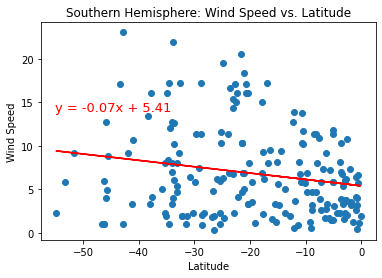

In [144]:
x_valueSH3 = sh_data['Lat']
y_valueSH3 = sh_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_valueSH3, y_valueSH3)
regress_values = x_valueSH3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_valueSH3,y_valueSH3)
plt.plot(x_valueSH3,regress_values,color='red')
plt.annotate(line_eq,(-55,14),fontsize=13,color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere: Wind Speed vs. Latitude")
plt.savefig("output_data/s_hemisphere_lat_wind.png")
plt.show()

We can see from these two plots that the northern hemisphere has a very weak positive correlation while the southern hemisphere has a very weak negative correlation. This tell us that wind speed is affected ever so slightly as the latitude increases.